**IMPORTING DATASET AND LIBRARIES**

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats
!unzip dogs-vs-cats.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dogs/dog.4419.jpg  
  inflating: train/dogs/dog.442.jpg  
  inflating: train/dogs/dog.4420.jpg  
  inflating: train/dogs/dog.4421.jpg  
  inflating: train/dogs/dog.4422.jpg  
  inflating: train/dogs/dog.4424.jpg  
  inflating: train/dogs/dog.4425.jpg  
  inflating: train/dogs/dog.4426.jpg  
  inflating: train/dogs/dog.4427.jpg  
  inflating: train/dogs/dog.4431.jpg  
  inflating: train/dogs/dog.4433.jpg  
  inflating: train/dogs/dog.4436.jpg  
  inflating: train/dogs/dog.4438.jpg  
  inflating: train/dogs/dog.4439.jpg  
  inflating: train/dogs/dog.444.jpg  
  inflating: train/dogs/dog.4440.jpg  
  inflating: train/dogs/dog.4441.jpg  
  inflating: train/dogs/dog.4442.jpg  
  inflating: train/dogs/dog.4443.jpg  
  inflating: train/dogs/dog.4444.jpg  
  inflating: train/dogs/dog.4445.jpg  
  inflating: train/dogs/dog.4446.jpg  
  inflating: train/dogs/dog.445.jpg  
  inflating: train/dogs/dog.4450.jpg  
  inflating: tra

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [4]:
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.


In [5]:
test_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 5000 files belonging to 2 classes.


**Normalization**

In [6]:
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label
train_ds=train_ds.map(process)
test_ds=test_ds.map(process)

**MODEL TRAINING**

In [7]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

**CROSS-VALIDATION**

In [9]:
history=model.fit(train_ds,epochs=10,validation_data=test_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 72s 92ms/step - accuracy: 0.5708 - loss: 2.5556 - val_accuracy: 0.6226 - val_loss: 0.8220
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 92ms/step - accuracy: 0.6798 - loss: 0.5937 - val_accuracy: 0.6570 - val_loss: 0.6556
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 91ms/step - accuracy: 0.7492 - loss: 0.5096 - val_accuracy: 0.7648 - val_loss: 0.4867
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 90ms/step - accuracy: 0.8061 - loss: 0.4263 - val_accuracy: 0.7840 - val_loss: 0.4766
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 91ms/step - accuracy: 0.8343 - loss: 0.3680 - val_accuracy: 0.7914 - val_loss: 0.4765
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 90ms/step - accuracy: 0.8755 - loss: 0.2887 - val_accuracy: 0.7734 - val_loss: 0.6934
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 91ms/step - accuracy: 0.9138 - loss: 0.2091 - val_accuracy: 0.8036 - val_loss: 0.5070
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 86ms/step - accuracy: 0.9505 - loss: 0.1347 - 

**VISUALIZATION**

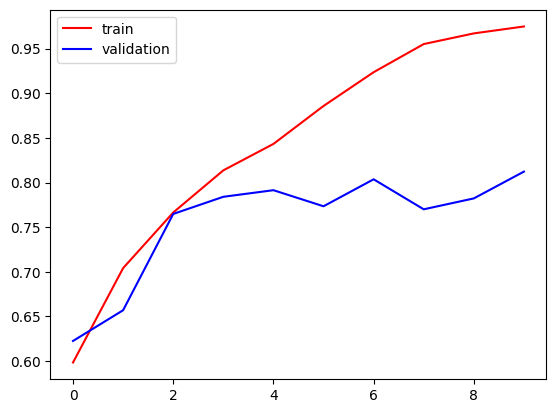

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

**MODEL TESTING**

In [25]:
import cv2
img=cv2.imread('/content/bharathi-kannan-rfL-thiRzDs-unsplash.jpg')


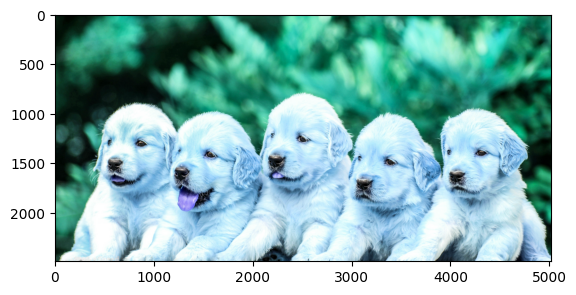

In [26]:
plt.imshow(img)

In [27]:
img.shape

(2491, 5016, 3)

In [28]:
test_img=cv2.resize(img,(256,256))

In [29]:
test_input=test_img.reshape((1,256,256,3))

In [30]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([[6.357617e-18]], dtype=float32)

In [19]:
img2=cv2.imread('/content/raquel-pedrotti-AHgpNYkX9dc-unsplash.jpg')

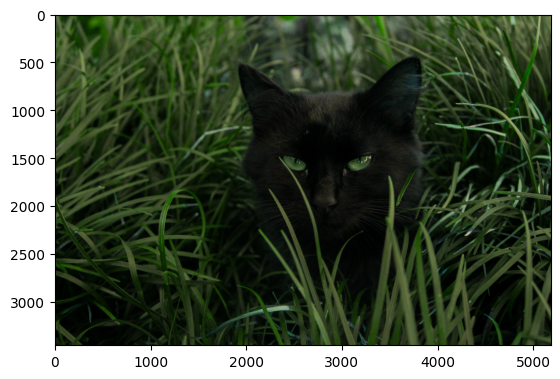

In [20]:
plt.imshow(img2)

In [21]:
img2.shape

(3456, 5184, 3)

In [22]:
test_input2=cv2.resize(img2,(256,256))

In [23]:
test_input2=test_input2.reshape((1,256,256,3))

In [24]:
model.predict(test_input2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([[1.]], dtype=float32)